### Simulating simple DAGs to showcase PC and Cluster-PC difference

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
import numpy as np
from scipy import linalg
from causallearn.search.ConstraintBased.PC import pc
from causallearn.graph.GeneralGraph import GeneralGraph

from clustercausal.experiments.Simulator import Simulator
from clustercausal.experiments.Evaluator import Evaluator
from clustercausal.algorithms.ClusterPC import ClusterPC as ClusterPC
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from clustercausal.utils.Utils import *

c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Detecting 1 CUDA device(s).
2023-09-29 14:21:26,284 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\rpy2\situation.py[line:41] - INFO: cffi mode is CFFI_MODE.ANY
2023-09-29 14:21:26,296 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\rpy2\situation.py[line:218] - INFO: R home found: C:\Program Files\R\R-4.3.1
2023-09-29 14:21:26,322 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\rpy2\rinterface_lib\embedded.py[line:20] - INFO: Default options to initialize R: rpy2, --quiet, --no-save


### 2 nodes

2023-09-29 14:21:27,408 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


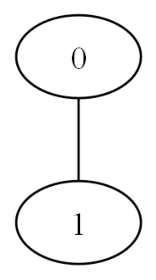

In [2]:
%autoreload 2
node_names = ['0', '1']
simulation = Simulator(n_nodes = 2, n_edges = 1, n_clusters = 1, seed = 122663, sample_size = 1000, node_names=node_names)
cluster_dag = simulation.run()
# cluster_dag.cluster_graph.draw_pydot_graph()
cluster_dag.cdag_to_mpdag()
cluster_dag.cg.draw_pydot_graph()

Depth=0, working on node 1: 100%|██████████| 2/2 [00:00<?, ?it/s]


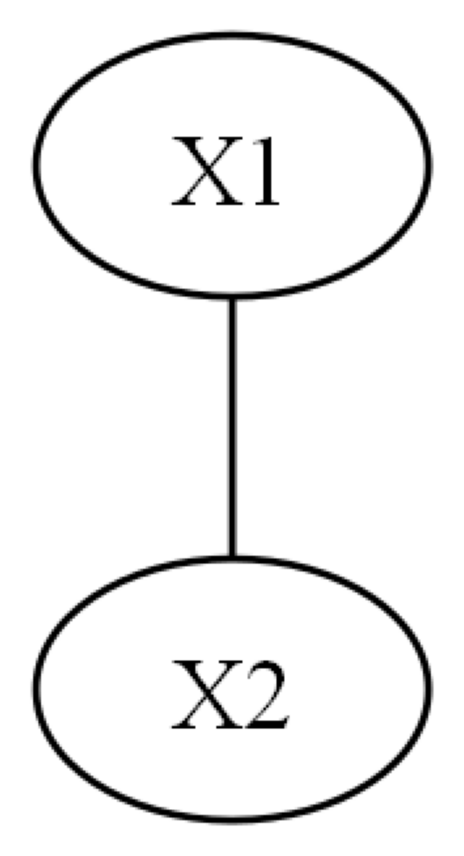

In [3]:
alpha = 0.05
base_pc = pc(cluster_dag.data, alpha, verbose = False, show_progress = True)
base_pc.draw_pydot_graph()

C1 phase, Depth=0, working on node 1: 100%|██████████| 2/2 [00:00<00:00, 108.55it/s, duration: 0.02sec]


Duration of algorithm was 0.02sec


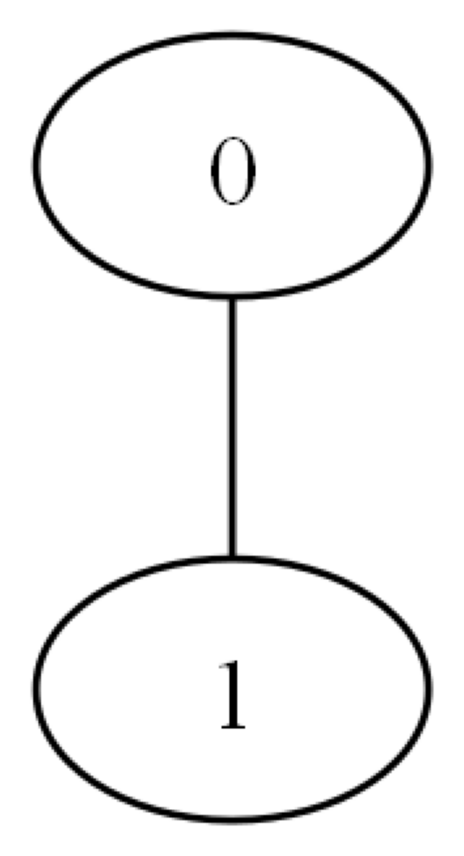

In [4]:
cluster_pc = ClusterPC(data = cluster_dag.data, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()
cluster_pc.cdag.cg.draw_pydot_graph()

2 nodes 2 clusters

2023-09-29 14:21:29,282 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


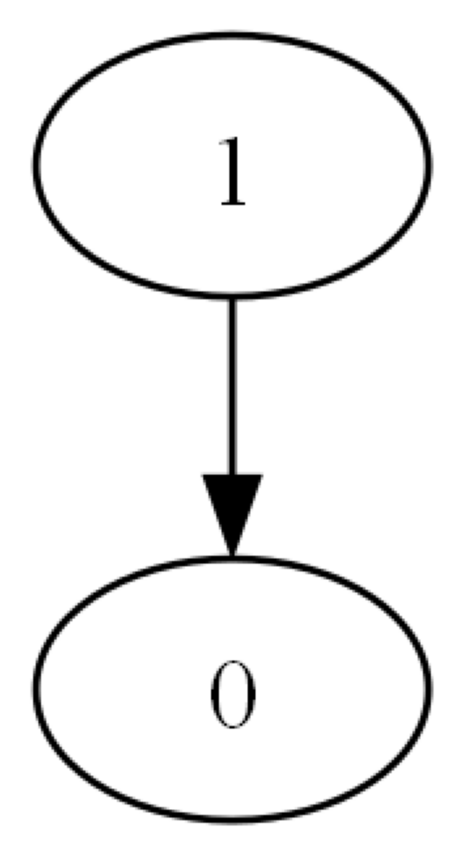

In [5]:
%autoreload 2
node_names = ['0', '1']
simulation = Simulator(n_nodes = 2, n_edges = 1, n_clusters = 2, seed = 122663, sample_size = 1000, node_names=node_names)
cluster_dag = simulation.run()
# cluster_dag.cluster_graph.draw_pydot_graph()
cluster_dag.cdag_to_mpdag()
cluster_dag.cg.draw_pydot_graph()

Depth=0, working on node 1: 100%|██████████| 2/2 [00:00<00:00, 177.24it/s]


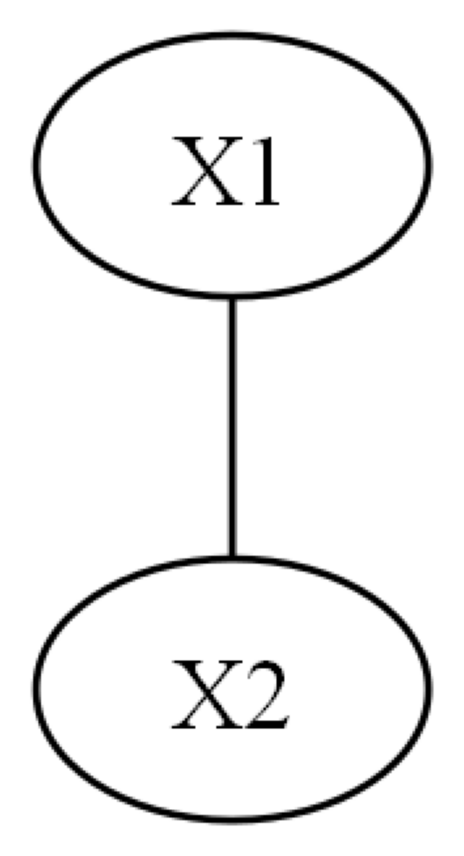

In [6]:
alpha = 0.05
base_pc = pc(cluster_dag.data, alpha, verbose = False, show_progress = True)
base_pc.draw_pydot_graph()

C2 phase, Depth=0, working on node 0: 100%|██████████| 1/1 [00:00<00:00, 78.33it/s, duration: 0.01sec]

Duration of algorithm was 0.01sec


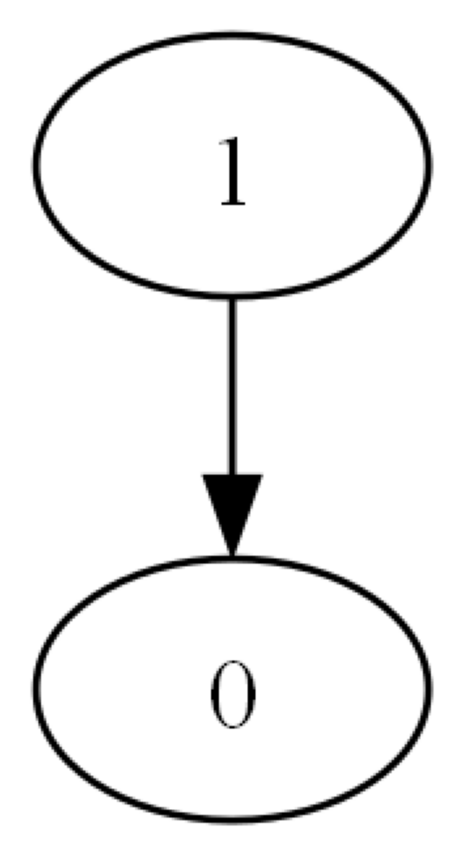

In [7]:
cluster_pc = ClusterPC(data = cluster_dag.data, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()
cluster_pc.cdag.cg.draw_pydot_graph()

### 3 nodes

2023-09-29 14:21:31,110 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


{'C1': ['2'], 'C2': ['0', '1']}


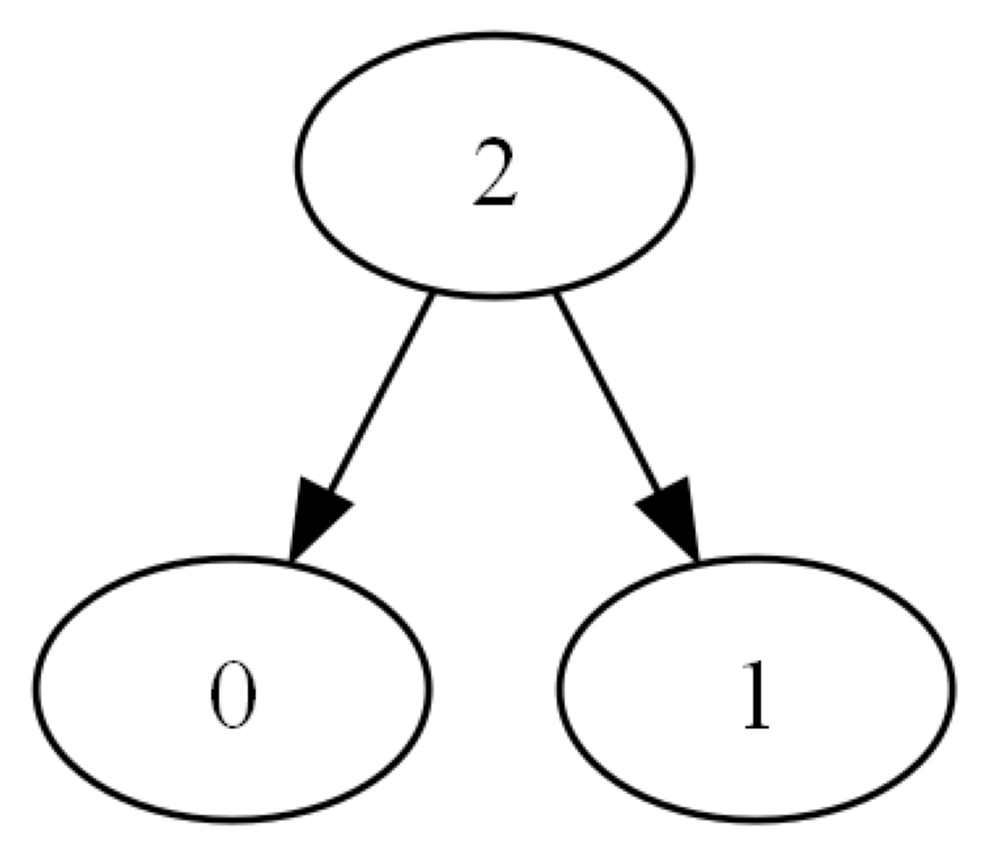

In [8]:
%autoreload 2
node_names = ['0', '1', '2']
simulation = Simulator(n_nodes = 3, n_edges = 2, n_clusters = 2, seed = 7, sample_size = 10000, node_names=node_names, \
                       weight_range= (-1,2), distribution_type= 'gauss', scm_method = 'linear')
cluster_dag = simulation.run()
# cluster_dag.cluster_graph.draw_pydot_graph()
# cluster_dag.cdag_to_mpdag()
# cluster_dag.cg.draw_pydot_graph()
print(cluster_dag.cluster_mapping)
cluster_dag.true_dag.draw_pydot_graph()

In [9]:
d = 3
sample_size = 10000
W = np.diag(np.ones(d-1), 1)
X = np.random.randn(sample_size, d).dot(linalg.inv(np.eye(d) - W))

Depth=1, working on node 2: 100%|██████████| 3/3 [00:00<?, ?it/s]         


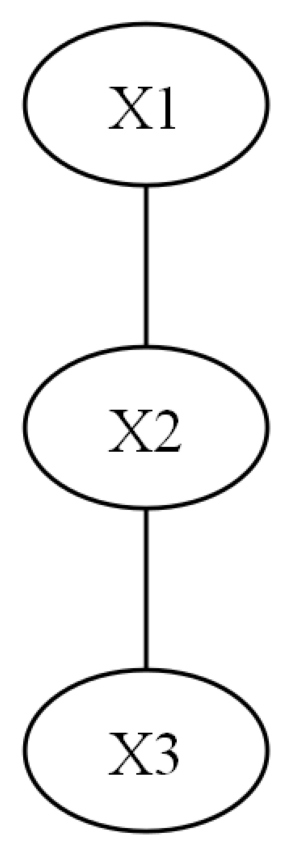

In [10]:
base_pc = pc(X, alpha, verbose = False, show_progress = True)
base_pc.draw_pydot_graph()

C1 phase, Depth=1, working on node 2: 100%|██████████| 3/3 [00:00<?, ?it/s, duration: 0.02sec]

Duration of algorithm was 0.02sec


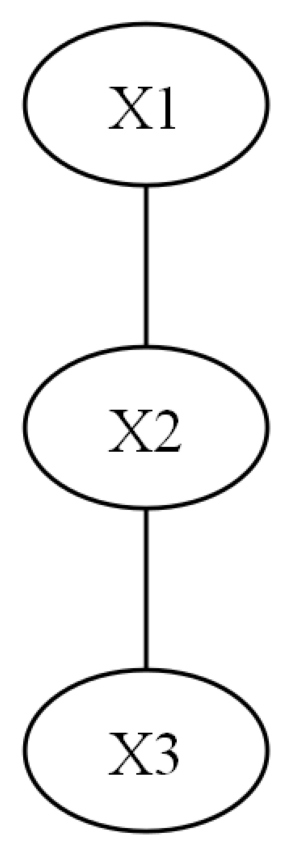

In [11]:
cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1', 'X2', 'X3']}, cluster_edges = [])
cluster_pc = ClusterPC(data = X, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()
cluster_pc.cdag.cg.draw_pydot_graph()

C2 phase, Depth=1, working on node 2: 100%|██████████| 1/1 [00:00<?, ?it/s, duration: 0.00sec]

Duration of algorithm was 0.02sec


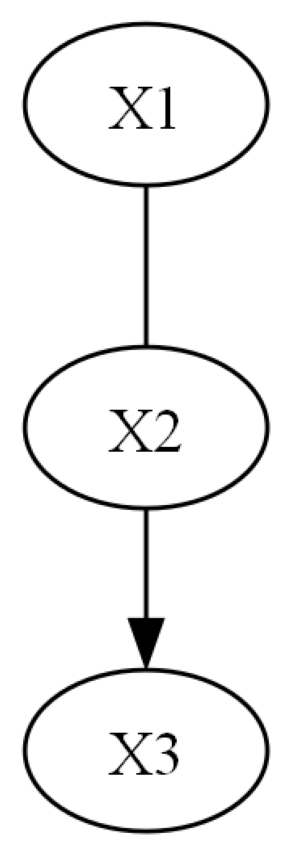

In [12]:
cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1', 'X2'], 'C2': ['X3']}, cluster_edges = [('C1', 'C2')])
cluster_pc = ClusterPC(data = X, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()
cluster_pc.cdag.cg.draw_pydot_graph()

Able to infer extra edge orientation rule

C2 phase, Depth=1, working on node 2: 100%|██████████| 2/2 [00:00<00:00, 127.97it/s, duration: 0.02sec]

Duration of algorithm was 0.02sec


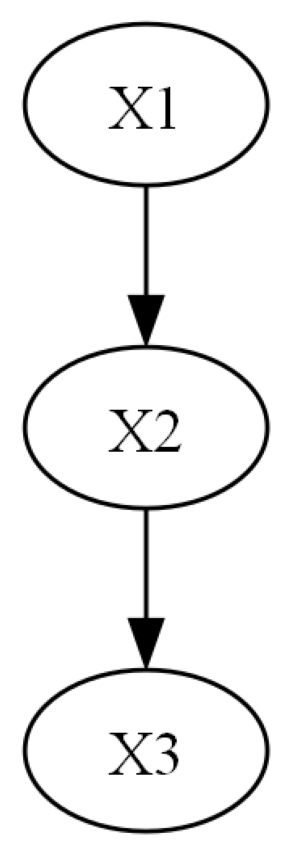

In [13]:
cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1'], 'C2': ['X2', 'X3']}, cluster_edges = [('C1', 'C2')])
cluster_pc = ClusterPC(data = X, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()
cluster_pc.cdag.cg.draw_pydot_graph()

Graph with collider

In [14]:
d = 3
sample_size = 10000
W = np.zeros((d,d))
W[0,2] = 1
W[1,2] = 1
X = np.random.randn(sample_size, d).dot(linalg.inv(np.eye(d) - W))

Depth=1, working on node 2: 100%|██████████| 3/3 [00:00<?, ?it/s]


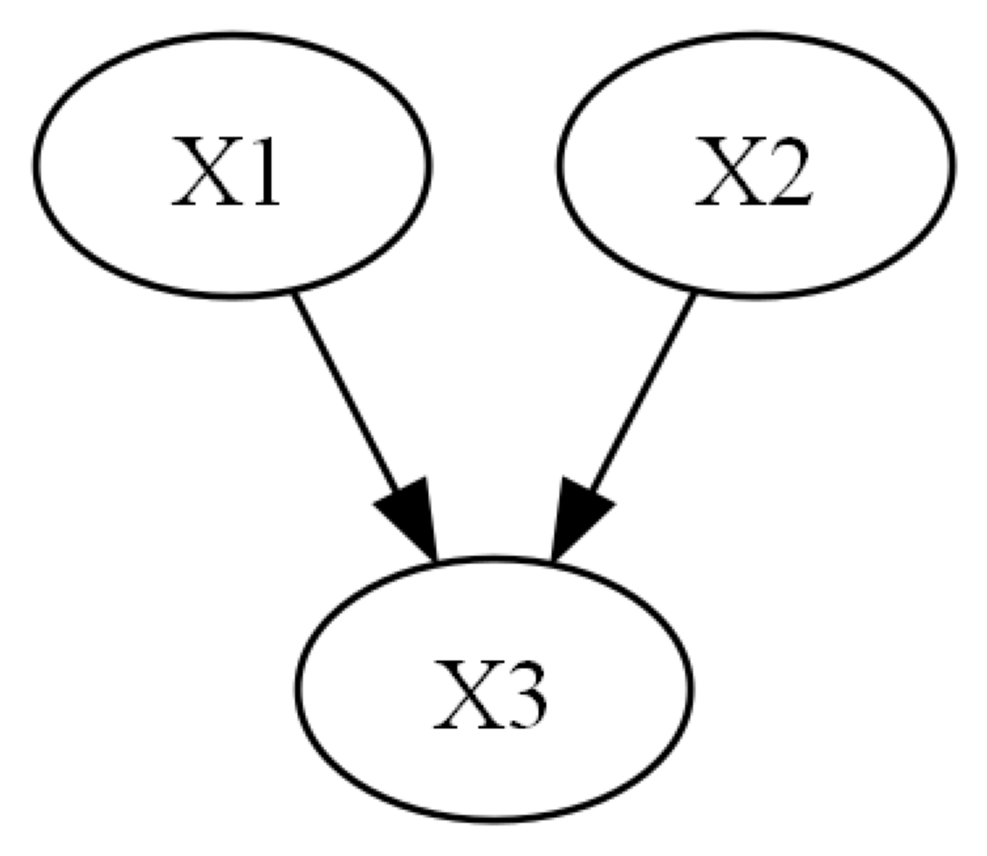

In [15]:
base_pc = pc(X, alpha, verbose = False, show_progress = True)
base_pc.draw_pydot_graph()

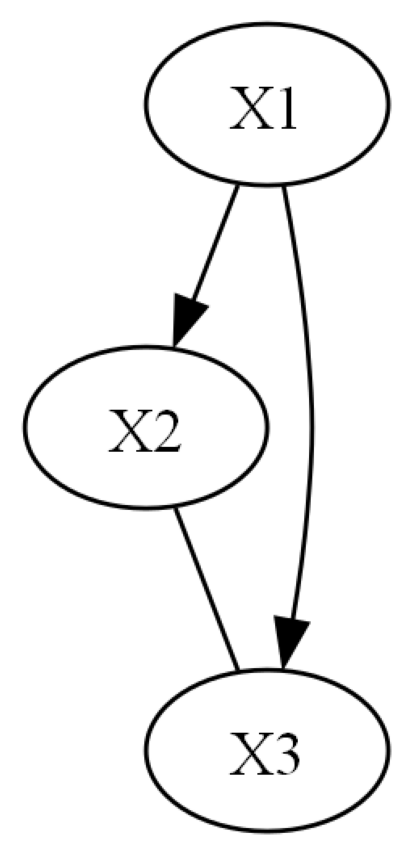

In [16]:
# Graph before fitting
cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1'], 'C2': ['X2', 'X3']}, cluster_edges = [('C1', 'C2')])
cluster_dag.cdag_to_mpdag()
cluster_dag.cg.draw_pydot_graph()

C2 phase, Depth=1, working on node 2: 100%|██████████| 2/2 [00:00<?, ?it/s, duration: 0.00sec]


Duration of algorithm was 0.01sec


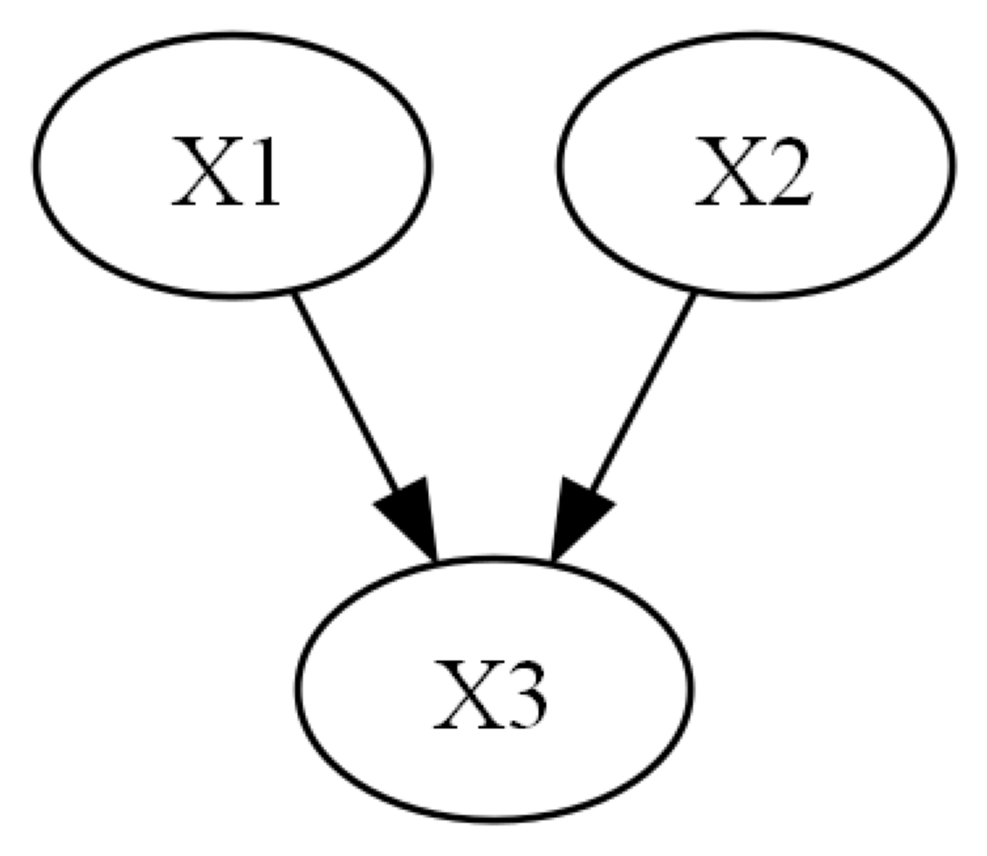

In [17]:
# Graph after fitting
cluster_pc = ClusterPC(data = X, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()
cluster_pc.cdag.cg.draw_pydot_graph()

### Graph with 5 nodes and only downward paths

In [48]:
d = 5
sample_size = 10000
W = np.diag(np.ones(d-1), 1)
X = np.random.randn(sample_size, d).dot(linalg.inv(np.eye(d) - W))

Depth=2, working on node 4: 100%|██████████| 5/5 [00:00<00:00, 331.87it/s]


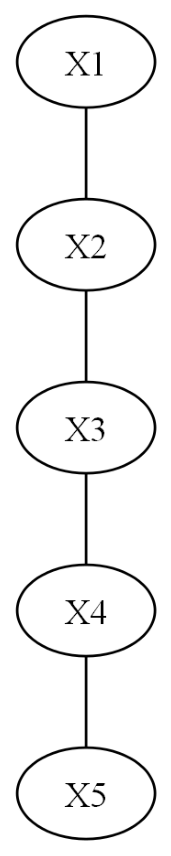

In [49]:
base_pc = pc(X, alpha, verbose = False, show_progress = True)
base_pc.draw_pydot_graph()

C2 phase, Depth=2, working on node 4: 100%|██████████| 4/4 [00:00<00:00, 993.85it/s, duration: 0.03sec]

Duration of algorithm was 0.04sec


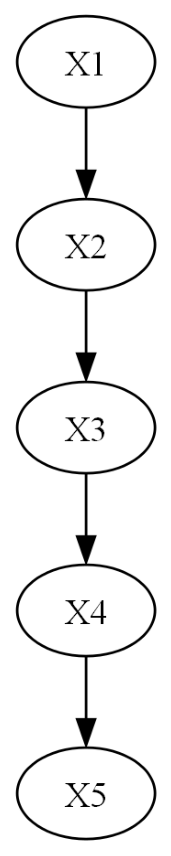

In [50]:
cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1'], 'C2': ['X2', 'X3', 'X4', 'X5']}, cluster_edges = [('C1', 'C2')])
cluster_pc = ClusterPC(data = X, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()
cluster_pc.cdag.cg.draw_pydot_graph()

### Graph with 5 nodes No.1

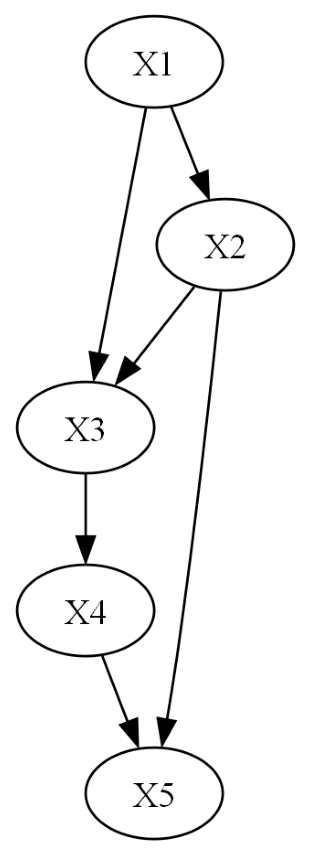

In [51]:
# List of node names
node_names = ["X1", "X2", "X3", "X4", "X5"]

# Parent dictionary
parent_dict = {
    "X1": [],               # X1 has no parents
    "X2": ["X1"],           # X2 has X1 as a parent
    "X3": ["X1", "X2"],     # X3 has both X1 and X2 as parents
    "X4": ["X3"],           # X4 has X3 as a parent
    "X5": ["X2", "X4"],     # X5 has both X2 and X4 as parents
}

# Call the make_graph function from Utils
truth, W = make_graph(node_names, parent_dict)

truth.draw_pydot_graph()

In [52]:
X = gaussian_data(W, 10000)
alpha = 0.05

Depth=3, working on node 4: 100%|██████████| 5/5 [00:00<00:00, 320.02it/s] 


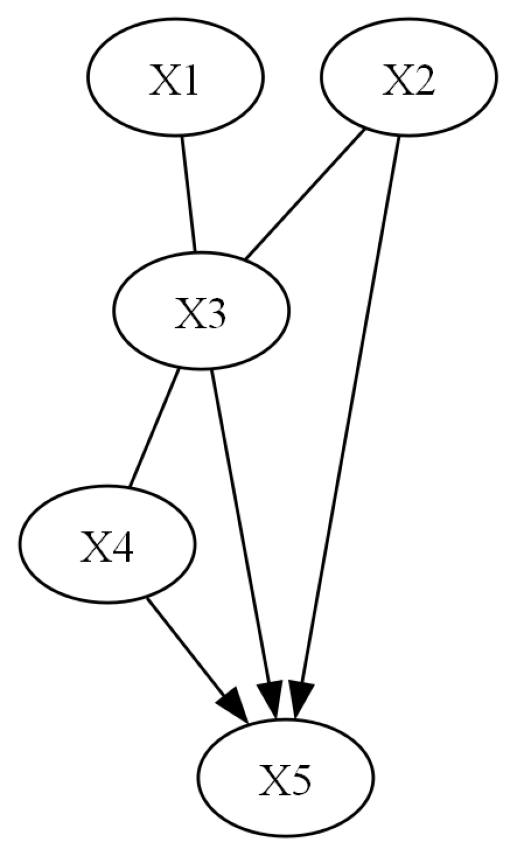

In [53]:
base_pc = pc(X, alpha = alpha, verbose = False, show_progress = True)
base_pc.draw_pydot_graph()

C2 phase, Depth=3, working on node 4: 100%|██████████| 3/3 [00:00<00:00, 185.00it/s, duration: 0.05sec]


Duration of algorithm was 0.05sec


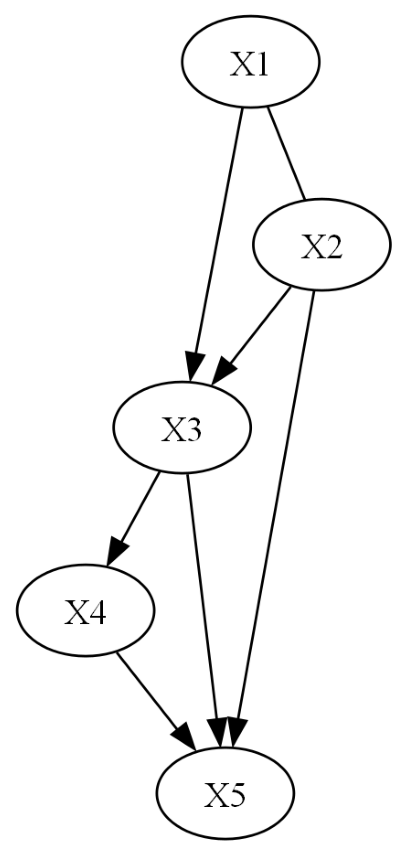

In [54]:
cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1', 'X2'], 'C2': ['X3', 'X4', 'X5']}, cluster_edges = [('C1', 'C2')])
cluster_pc = ClusterPC(data = X, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()
cluster_pc.cdag.cg.draw_pydot_graph()

In [55]:
evaluation_cluster = Evaluator(truth = truth.G, est = cluster_pc.cdag.cg.G)
cluster_adjacency_confusion, cluster_arrow_confusion, cluster_shd, cluster_sid = evaluation_cluster.get_causallearn_metrics(sid = False)
evaluation_base = Evaluator(truth = truth.G, est = base_pc.G)
evaluation_empty = Evaluator(truth = truth.G, est = GeneralGraph(truth.G.nodes))
base_adjacency_confusion, base_arrow_confusion, base_shd, base_sid = evaluation_base.get_causallearn_metrics(sid = False)
empty_sid = evaluation_empty.get_shd()

In [56]:
print("Cluster PC SHD: ", cluster_shd)
print("Base PC SHD: ", base_shd)
print("Empty SHD: ", empty_sid)

Cluster PC SHD:  1
Base PC SHD:  2
Empty SHD:  6


### Graph with 5 nodes No.2

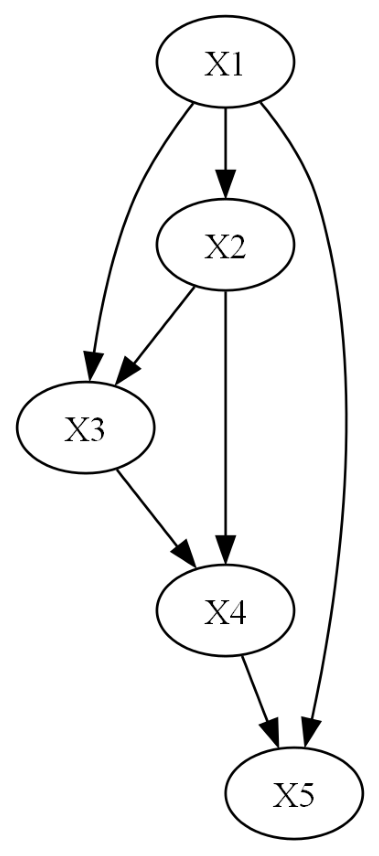

In [78]:
# List of node names
node_names = ["X1", "X2", "X3", "X4", "X5"]

# Parent dictionary
parent_dict = {
    "X1": [],               # X1 has no parents
    "X2": ["X1"],           # X2 has X1 as a parent
    "X3": ["X1", "X2"],     # X3 has both X1 and X2 as parents
    "X4": ["X2", "X3"],           # X4 has X3 as a parent
    "X5": ["X1", "X4"],     # X5 has both X2 and X4 as parents
}

# Call the make_graph function from Utils
truth, W = make_graph(node_names, parent_dict)

truth.draw_pydot_graph()

In [79]:
X = gaussian_data(W, 10000, seed = 42)
alpha = 0.05

Depth=2, working on node 4: 100%|██████████| 5/5 [00:00<00:00, 661.04it/s] 


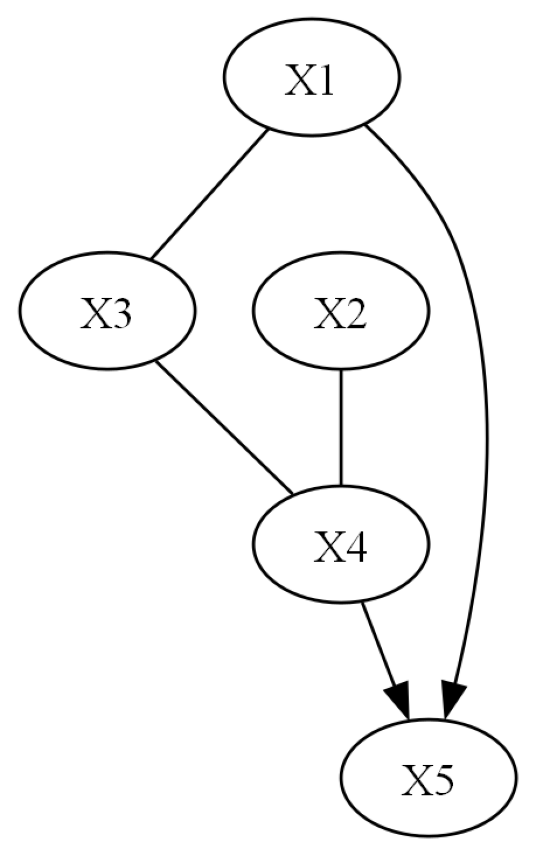

In [80]:
base_pc = pc(X, alpha = alpha, verbose = False, show_progress = True)
base_pc.draw_pydot_graph()

C2 phase, Depth=2, working on node 4: 100%|██████████| 3/3 [00:00<?, ?it/s, duration: 0.03sec]


Duration of algorithm was 0.05sec


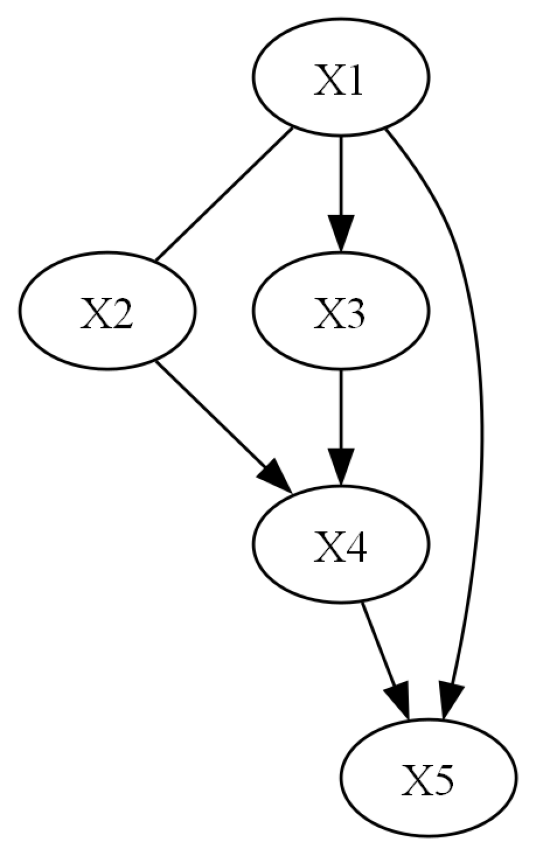

In [81]:
cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1', 'X2'], 'C2': ['X3', 'X4', 'X5']}, cluster_edges = [('C1', 'C2')])
cluster_pc = ClusterPC(data = X, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()
cluster_pc.cdag.cg.draw_pydot_graph()

In [82]:
from causallearn.graph.GeneralGraph import GeneralGraph
evaluation_cluster = Evaluator(truth = truth.G, est = cluster_pc.cdag.cg.G)
cluster_adjacency_confusion, cluster_arrow_confusion, cluster_shd, cluster_sid = evaluation_cluster.get_causallearn_metrics(sid = False)
evaluation_base = Evaluator(truth = truth.G, est = base_pc.G)
evaluation_empty = Evaluator(truth = truth.G, est = GeneralGraph(truth.G.nodes))
base_adjacency_confusion, base_arrow_confusion, base_shd, base_sid = evaluation_base.get_causallearn_metrics(sid = False)
empty_sid = evaluation_empty.get_shd()

In [83]:
print("Cluster PC SHD: ", cluster_shd)
print("Base PC SHD: ", base_shd)
print("Empty SHD: ", empty_sid)

Cluster PC SHD:  1
Base PC SHD:  2
Empty SHD:  7


### Graph with 7 nodes No.1

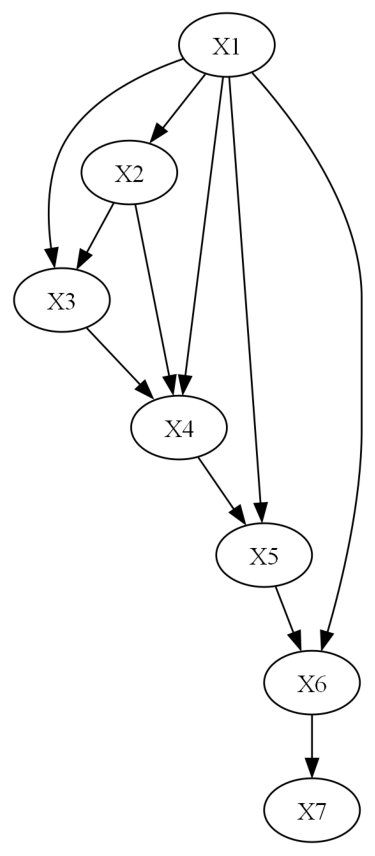

In [96]:
# List of node names
node_names = ["X1", "X2", "X3", "X4", "X5", "X6", "X7"]

# Parent dictionary
parent_dict = {
    "X1": [],               # X1 has no parents
    "X2": ["X1"],           # X2 has X1 as a parent
    "X3": ["X1", "X2"],     # X3 has both X1 and X2 as parents
    "X4": ["X1", "X2", "X3"],           # X4 has X3 as a parent
    "X5": ["X1", "X4"],     # X5 has both X2 and X4 as parents
    "X6": ["X1", "X5"],
    "X7": ["X6"]
}

# Call the make_graph function from Utils
truth, W = make_graph(node_names, parent_dict)

truth.draw_pydot_graph()

In [97]:
X = gaussian_data(W, 10000)
alpha = 0.05

Depth=2, working on node 6: 100%|██████████| 7/7 [00:00<00:00, 504.10it/s] 


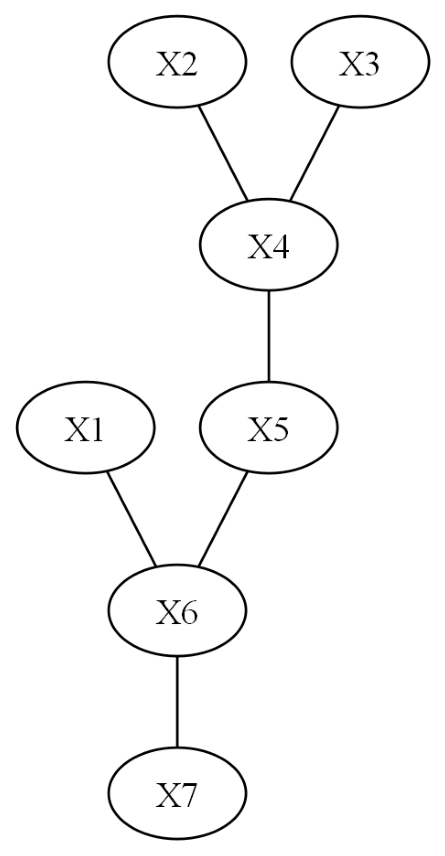

In [98]:
base_pc = pc(X, alpha = alpha, verbose = False, show_progress = True)
base_pc.draw_pydot_graph()

C2 phase, Depth=2, working on node 6: 100%|██████████| 4/4 [00:00<00:00, 146.23it/s, duration: 0.10sec]


Duration of algorithm was 0.13sec


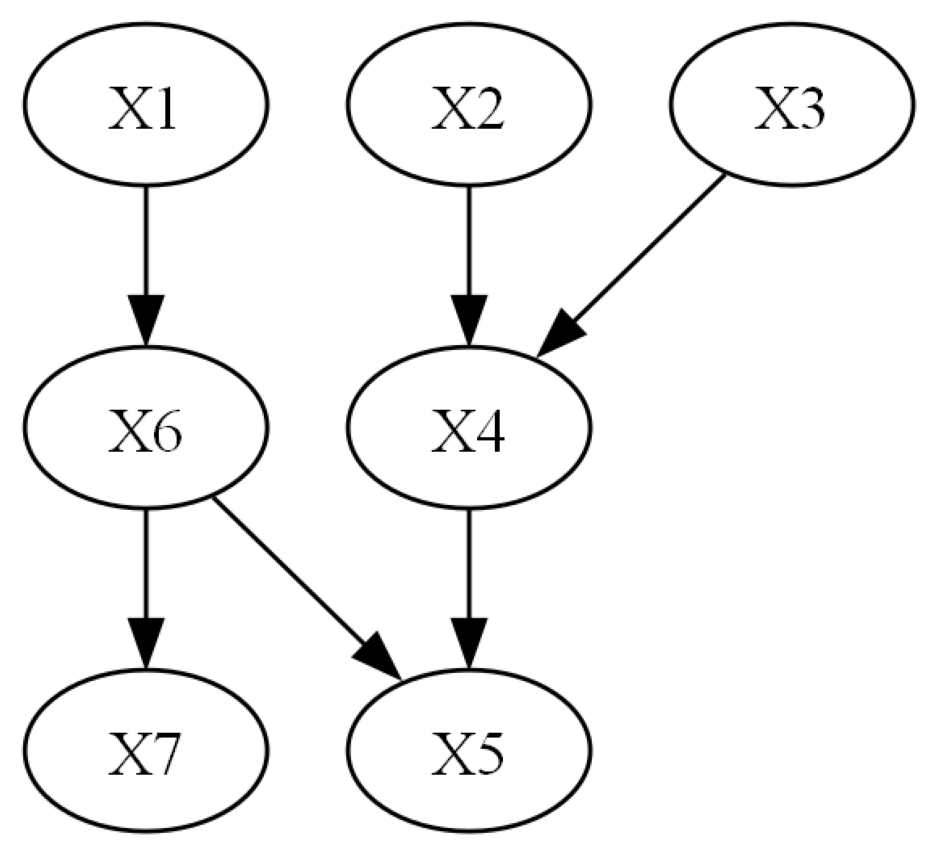

In [102]:
cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1', 'X2', 'X3'], 'C2': [ 'X4', 'X5', 'X6', 'X7']}, cluster_edges = [('C1', 'C2')])
cluster_pc = ClusterPC(data = X, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()
cluster_pc.cdag.cg.draw_pydot_graph()

In [103]:
evaluation_cluster = Evaluator(truth = truth.G, est = cluster_pc.cdag.cg.G)
cluster_adjacency_confusion, cluster_arrow_confusion, cluster_shd, cluster_sid = evaluation_cluster.get_causallearn_metrics(sid = False)
evaluation_base = Evaluator(truth = truth.G, est = base_pc.G)
evaluation_empty = Evaluator(truth = truth.G, est = GeneralGraph(truth.G.nodes))
base_adjacency_confusion, base_arrow_confusion, base_shd, base_sid = evaluation_base.get_causallearn_metrics(sid = False)
empty_sid = evaluation_empty.get_shd()

invalid value encountered in double_scalars
invalid value encountered in double_scalars


In [105]:
print("Cluster PC SHD: ", cluster_shd)
print("Base PC SHD: ", base_shd)
print("Empty SHD: ", empty_sid)

Cluster PC SHD:  6
Base PC SHD:  5
Empty SHD:  11


In [107]:
print("Cluster adjacency confusion", cluster_adjacency_confusion)
print("Cluster arrow confusion", cluster_arrow_confusion)
print("Base adjacency confusion", base_adjacency_confusion)

Cluster adjacency confusion {'true_positive': 6, 'false_positive': 0, 'false_negative': 5, 'true_negative': 10, 'precision': 1.0, 'recall': 0.5454545454545454, 'f1_score': 0.7058823529411764}
Cluster arrow confusion {'true_positive': 5.0, 'false_positive': 1.0, 'false_negative': 6.0, 'true_negative': 37.0, 'precision': 0.8333333333333334, 'recall': 0.45454545454545453, 'f1_score': 0.5882352941176471, 'true_positive_ce': 5.0, 'false_positive_ce': 1.0, 'false_negative_ce': 1.0, 'true_negative_ce': 42.0, 'precision_ce': 0.8333333333333334, 'recall_ce': 0.8333333333333334, 'f1_score_ce': 0.8333333333333334}
Base adjacency confusion {'true_positive': 6, 'false_positive': 0, 'false_negative': 5, 'true_negative': 10, 'precision': 1.0, 'recall': 0.5454545454545454, 'f1_score': 0.7058823529411764}
